<a href="https://colab.research.google.com/github/julioreis-dev/data_science/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports and packages**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# **Exemple 1**
# f(x) = $x^2 + x + 1$

In [17]:
def f1(x):
  return x**2 + x + 1

In [18]:
f = lambda x: x**2 + x + 1

In [19]:
# Make data with numpy
x_1 = np.linspace(start=-3, stop=3, num=100)

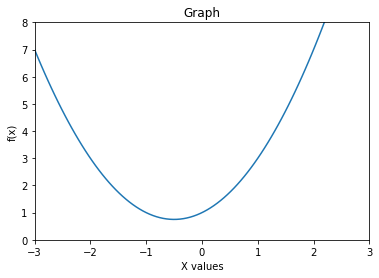

In [25]:
# Plot the graph
plt.plot(x_1, f(x_1))
plt.title('Graph')
plt.xlabel('X values')
plt.ylabel('f(x)')
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.show()

# **Derivative**

In [21]:
df = lambda x: 2*x + 1

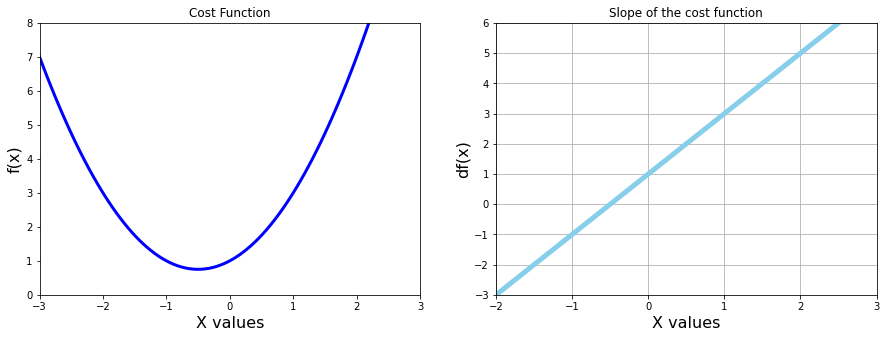

In [22]:
plt.figure(figsize=(15, 5))

# 1 charts: Cost function
plt.subplot(1, 2, 1)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)
plt.title('Cost Function')
plt.xlabel('X values', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.xlim(-3, 3)
plt.ylim(0, 8)

# 2 charts: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the cost function')
plt.xlabel('X values', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)
plt.grid()

plt.show()

In [29]:
df(3)

7

In [32]:
x = 3 - 0.1 *7
x

2.3

# **Gradient Descent**

In [37]:
new_x = 3
previus_x = 0
step_multiplier = 0.1
for n in range(30):
  previus_x = new_x
  gradient = df(previus_x)
  new_x = previus_x - step_multiplier * gradient
  print(gradient)

print(new_x)
print(df(new_x))
print(f(new_x))

7
5.6
4.4799999999999995
3.5839999999999996
2.8671999999999995
2.29376
1.8350079999999995
1.4680063999999997
1.1744051199999996
0.9395240959999998
0.7516192767999997
0.6012954214399998
0.4810363371519999
0.3848290697215999
0.3078632557772799
0.24629060462182395
0.19703248369745918
0.15762598695796737
0.12610078956637394
0.10088063165309913
0.0807045053224793
0.06456360425798346
0.051650883406386794
0.04132070672510946
0.03305656538008761
0.026445252304070133
0.02115620184325606
0.01692496147460487
0.01353996917968392
0.010831975343747136


In [81]:
def sing(num_bottles):
  list_bottles = []
  for n in range(1, num_bottles+1):
    phrase = ''
    list_bottles.append(phrase)

    phrase1 = 'Take one down and pass it around, {} bottles of beer on the wall.'.format(n-1)
    list_bottles.append(phrase1)

    phrase2 = '{} bottles of beer on the wall, {} bottles of beer.'.format(n, n)
    list_bottles.append(phrase2)

  return list_bottles[::-1]

In [83]:
print(sing(99))

['99 bottles of beer on the wall, 99 bottles of beer.', 'Take one down and pass it around, 98 bottles of beer on he wall.', '', '98 bottles of beer on the wall, 98 bottles of beer.', 'Take one down and pass it around, 97 bottles of beer on he wall.', '', '97 bottles of beer on the wall, 97 bottles of beer.', 'Take one down and pass it around, 96 bottles of beer on he wall.', '', '96 bottles of beer on the wall, 96 bottles of beer.', 'Take one down and pass it around, 95 bottles of beer on he wall.', '', '95 bottles of beer on the wall, 95 bottles of beer.', 'Take one down and pass it around, 94 bottles of beer on he wall.', '', '94 bottles of beer on the wall, 94 bottles of beer.', 'Take one down and pass it around, 93 bottles of beer on he wall.', '', '93 bottles of beer on the wall, 93 bottles of beer.', 'Take one down and pass it around, 92 bottles of beer on he wall.', '', '92 bottles of beer on the wall, 92 bottles of beer.', 'Take one down and pass it around, 91 bottles of beer o